In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Veri setini okuduk.
raw_data = pd.read_csv("creditcard.csv")
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [47]:
# Elimizdeki veri ile ilgili detaylara baktık.
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Veri Analizi

In [48]:
raw_data.isna().sum().max() # Veri seti içerisinde boş veri var mı diye kontrol ediyoruz.

0

In [ ]:
dups = raw_data.duplicated()  # Tekrarlanan veri sayısını gösterir.
print(dups.sum())

In [ ]:
raw_data = raw_data.drop_duplicates() # Tekrarlanan satırları sildik.

In [49]:
raw_data["Class"].value_counts()*100/len(raw_data) # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte), 0 ise normal kredi kartı olduğunu gösterir.

0    99.827251
1     0.172749
Name: Class, dtype: float64

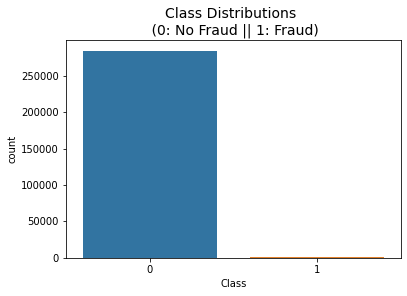

In [50]:
# Class sütunun grafik üzerinden gösterilmesi
sns.countplot(x='Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

In [51]:
# Scale edilmemiş Time ve amount sütunlarını scale ettik.
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()
raw_data["Scaled_amount"] = scaler.fit_transform(raw_data["Amount"].values.reshape(-1,1))
raw_data["Scaled_time"] = scaler.fit_transform(raw_data["Time"].values.reshape(-1,1))
raw_data.drop(["Amount","Time"],axis=1,inplace=True)

raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [52]:
# Over sampling
raw_data_0 = raw_data[raw_data["Class"]==0] # Sadece 0 etiketli veri
raw_data_1 = raw_data[raw_data["Class"]==1] # Sadece 1 etiketli veri
data_0_count = len(raw_data_0) # 0 değerli datanın sayısı
data_1_count = len(raw_data_1) # 1 değerli datanın sayısı
data_1 = raw_data_1.sample(data_0_count,replace=True) # Over sampling işlemi
data = pd.concat([raw_data_0, data_1], axis=0,ignore_index=True) # Over samplingten sonra datanın birleştirilmesi
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,...,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,1,-0.297771,0.647611
568626,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,-15.563791,...,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,1,1.146231,0.107931
568627,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,-5.175660,...,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,1,1.406833,0.749386
568628,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,-9.332128,...,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1,-0.293440,-0.323418


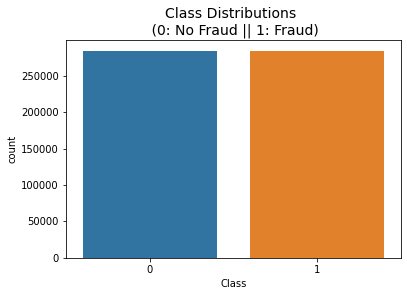

In [53]:
# Veri seti dengelendikten sonraki grafiksel gösterimi
sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

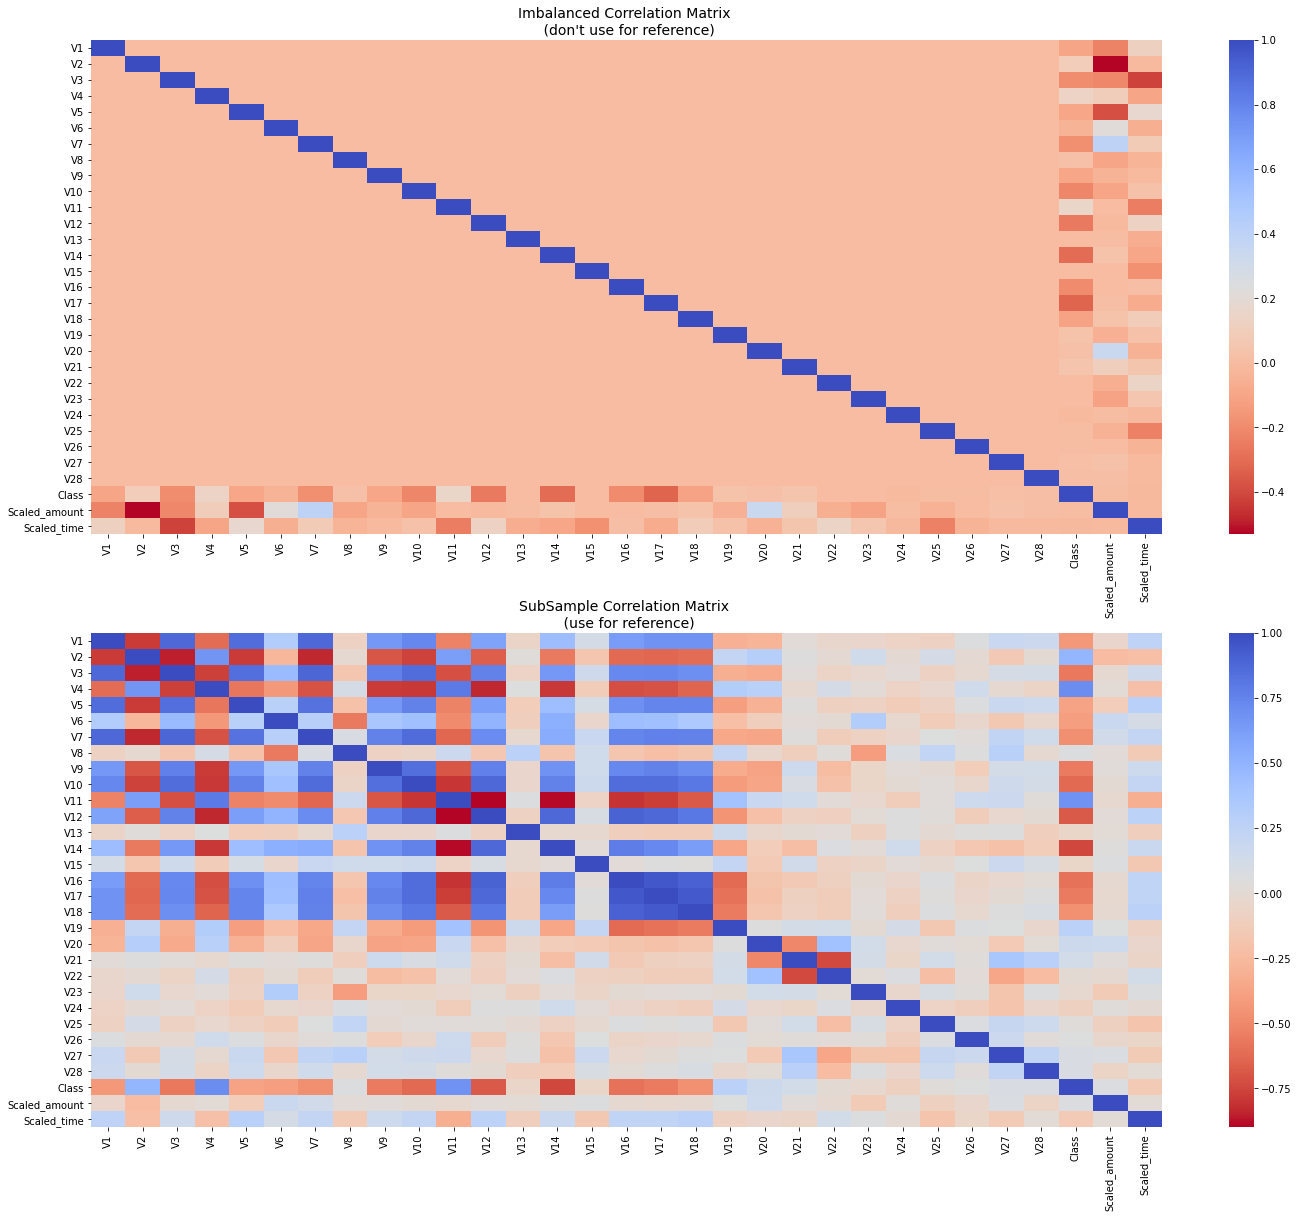

In [54]:
# Korelasyon matrisi
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Veri setinin korelasyon matrisi
corr = raw_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Veri seti dengesizken korelasyon matrisi", fontsize=14)

# Correlation matrix of over sampling data
sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Veri seti dengeliyken korelasyon matrisi', fontsize=14)
plt.show()

#### Summary and Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

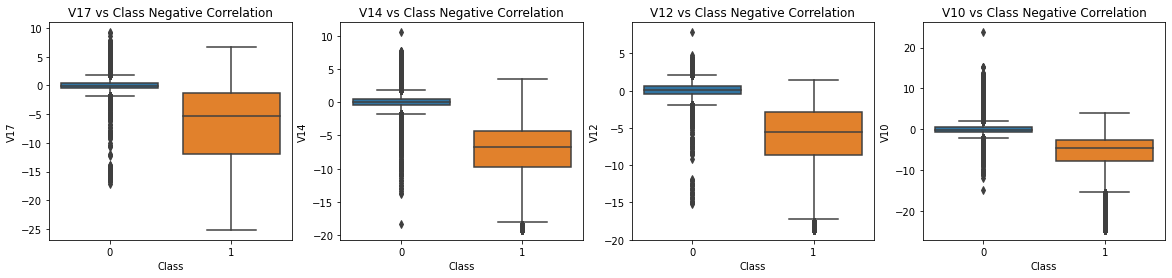

In [55]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

neg_corr = ["V17","V14","V12","V10"]
for i,v in enumerate(neg_corr,0):
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

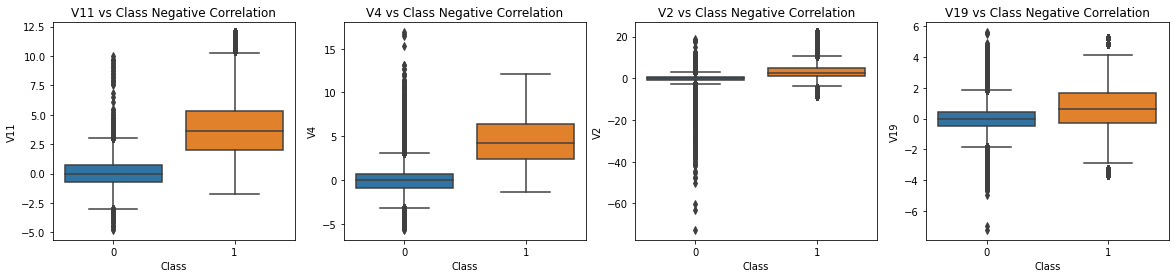

In [56]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

pos_corr = ["V11","V4","V2","V19"]
for i,v in enumerate(pos_corr,0):
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

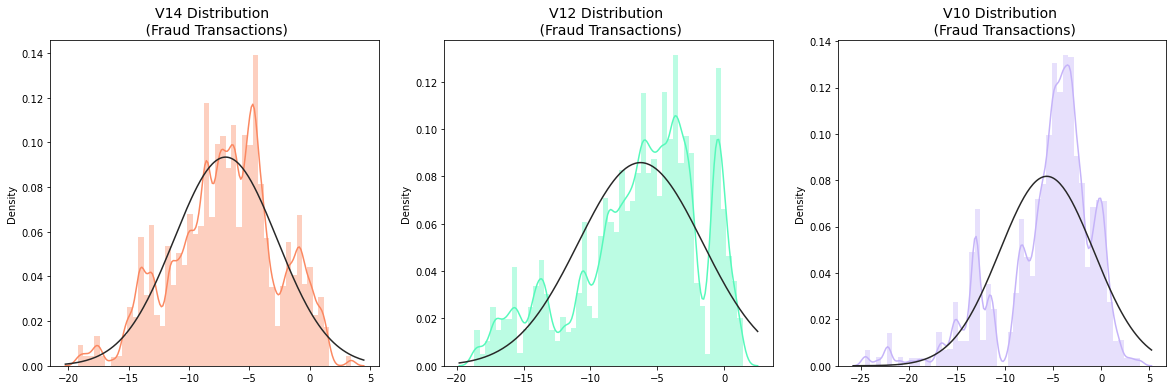

In [57]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [58]:
fraud = data[data['Class']==1] # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte) olduğunu gösterir.

normal = data[data['Class']==0] # Class sütunu eğer 0 ise bu bize kredi kartının normal olduğunu gösterir.

outlier_fraction = len(fraud)/float(len(normal))

In [59]:
# Over sampling
X = data.drop("Class",axis=1)
y = data["Class"]

In [60]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=0)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-9.45496734,  0.8700789 ],
       [-9.46120175,  0.77750331],
       [-9.56394136,  0.61984592],
       ...,
       [ 5.69755539, -3.33178316],
       [20.09422981,  3.87217804],
       [45.71102721, 25.25044801]])

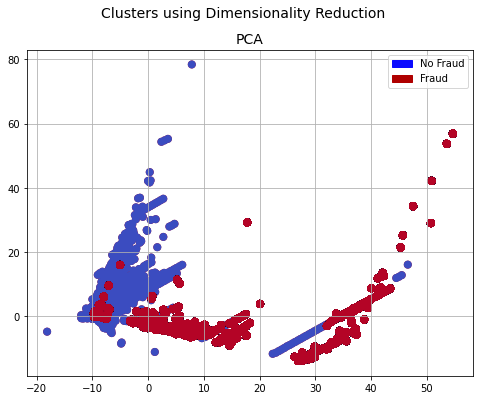

In [61]:
import matplotlib.patches as mpatches
f, ax = plt.subplots(1, 1, figsize=(8,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch]);

In [62]:
# Split the dataset to training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# Classifiers
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=10, 
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "One Class Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

classifiers_predicted = {
    "Isolation Forest": None,
    "Local Outlier Factor": None,
    "One Class Support Vector Machine": None
}

In [67]:
from sklearn.metrics import confusion_matrix

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf.fit(X_train,y_train)
        y_pred = clf.fit_predict(X_test)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
    else:    
        clf.fit(X_train,y_train)
        scores_prediction = clf.decision_function(X_test)
        y_pred = clf.predict(X_test)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    #n_errors = (y_pred != y_test).sum()
    # Run Classification Metrics
    #print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    print("Karmaşıklık Matrisi :")
    print(confusion_matrix(y_test,y_pred))

In [66]:
# Train the model and check the score with test set
#from sklearn.model_selection import cross_val_score

#for key, classifier in classifiers.items():
#    classifier.fit(X_train,y_train)
#    classifiers_predicted[key] = classifier.predict(X_test)
    #score = classifier.score(X_test,y_test)
    #print(f"The accuracy score of {key}: {np.mean(score)*100:.2f}%")

ValueError: contamination must be in (0, 0.5], got: 1.000000

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

for key, predicted in classifiers_predicted.items():
    print(key+":")
    print(confusion_matrix(y_test,predicted,))
    print()

LogisiticRegression:
[[55504  1242]
 [ 4311 52669]]



In [24]:
# Classification report
from sklearn.metrics import classification_report

for key, predicted in classifiers_predicted.items():
    print(key+":")
    print(classification_report(y_test,predicted,))
    print()

LogisiticRegression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56746
           1       0.98      0.92      0.95     56980

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726




In [25]:
# Train the model with cross validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"The accuracy score of {key}: {np.mean(score)*100:.2f}%")

The accuracy score of LogisiticRegression: 94.94%
